In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import CubicSpline
from scipy.optimize import curve_fit

# Find PWM for known angles

In [ ]:
# Convert desired degrees to PWM based on datasheet formula
def deg2PWM(desire_deg_angles):
    output = []
    for angle in desire_deg_angles:
        pulse = round((7.4074 * angle) + 500, 0)
        output.append(pulse)
        print(f"// {angle} degrees => {pulse} PWM")
    return output

# Desired angles and corresponding PWM (based on formula)
desire_angles = [0, 45, 90, 135, 180]
desired_PWM = deg2PWM(desire_angles)
print("\nDesired PWM values:", desired_PWM)

// 0 degrees => 500.0 PWM
// 45 degrees => 833.0 PWM
// 90 degrees => 1167.0 PWM
// 135 degrees => 1500.0 PWM
// 180 degrees => 1833.0 PWM

Desired PWM values: [500.0, 833.0, 1167.0, 1500.0, 1833.0]


These are the ideal PWM signals to achive the given angles. But the servos are not always so pricise and does not follow the datasheet.

1. So using arduino code, we set the servo to 0° or better to 500 in PWM.

2. We attach the arm as close as possible to the 0° 

3. We move slowlu untill allign the sefrvo arm (with the 3D printed extension) to the 3D printed infrastructure. 

4. We save the real PWM for that specific servo in orther to reach the desire angle

5. We compute a function that maps the desire deg to PWM, taking in consideration all the errors, Using Laest Square regression

# Find real PWM for known angles

In [4]:
real_pwm_TESTLEG_SFR = np.array([564, 890, 1219, 1564, 1897])
real_pwm_TESTLEG_FFR = np.array([606, 930, 1265, 1606, 1930])
real_pwm_TESTLEG_TFR = np.array([555, 895, 1230, 1580, 1910])

In [5]:
real_pwm_SFR = np.array([600,933,1267,1620,1940])
real_pwm_FFR = np.array([580,920,1260,1610,1935])
real_pwm_TFR = np.array([620,950,1278,1630,1960])

In [2]:
real_pwm_SFL = np.array([570,900,1225,1575,1905]) #
real_pwm_FFL = np.array([630,960,1310,1670,2000])
real_pwm_TFL = np.array([550,880,1205,1555,1890])

In [6]:
real_pwm_SBR = np.array([590,910,1250,1620,1940])
real_pwm_FBR = np.array([550,883,1217,1580,1920])
real_pwm_TBR = np.array([560,883,1210,1555,1890])

In [7]:
real_pwm_SBL = np.array([620,940,1280,1640,1960])
real_pwm_FBL = np.array([630,970,1315,1660,1990])
real_pwm_TBL = np.array([640,970,1320,1670,1980])

# Least Square Regression








[ 600  933 1267 1620 1940], 0-------------

Quadratic equation coefficients: a = -0.00024691358024691337, b = 7.526666666666672, c = 597.6


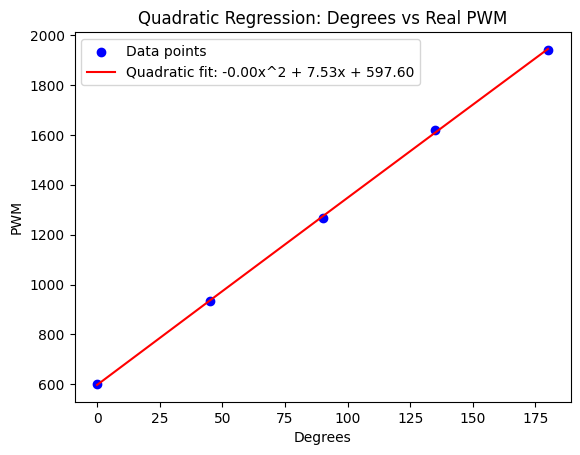








[ 580  920 1260 1610 1935], 1-------------

Quadratic equation coefficients: a = -0.0007054673721340339, b = 7.682539682539681, c = 578.142857142857


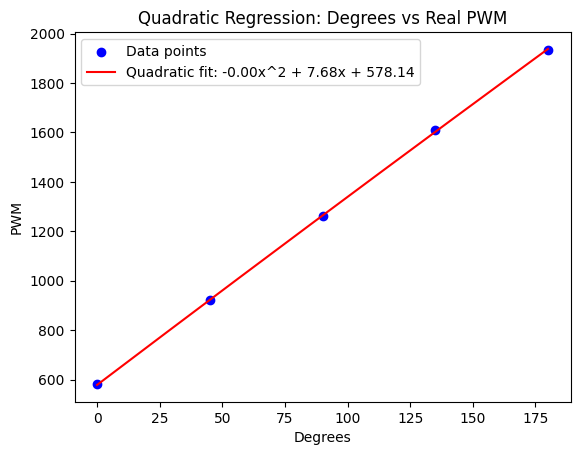








[ 620  950 1278 1630 1960], 2-------------

Quadratic equation coefficients: a = 0.0008465608465608521, b = 7.314285714285715, c = 619.0285714285715


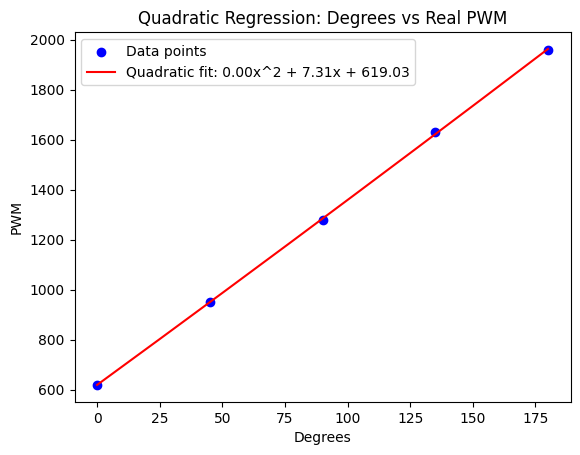








[ 570  900 1225 1575 1905], 3-------------

Quadratic equation coefficients: a = 0.0008818342151675447, b = 7.274603174603175, c = 569.5714285714284


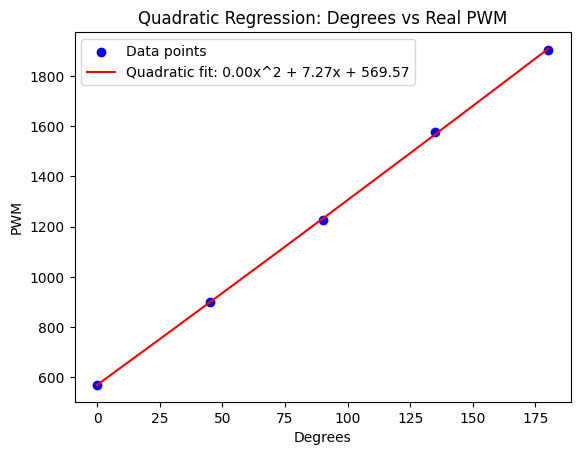








[ 630  960 1310 1670 2000], 4-------------

Quadratic equation coefficients: a = 0.0003527336860670407, b = 7.603174603174602, c = 625.4285714285716


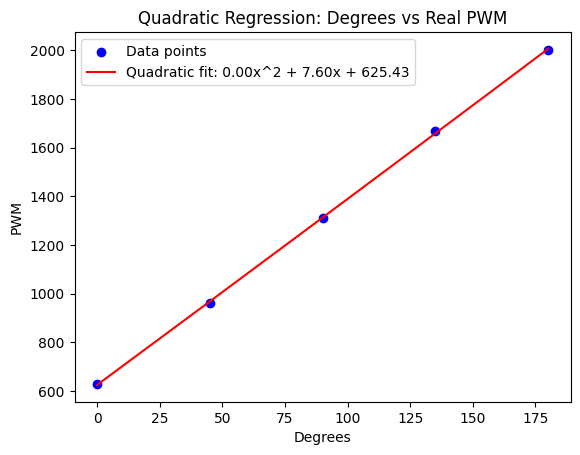








[ 550  880 1205 1555 1890], 5-------------

Quadratic equation coefficients: a = 0.001234567901234578, b = 7.2333333333333325, c = 549.9999999999998


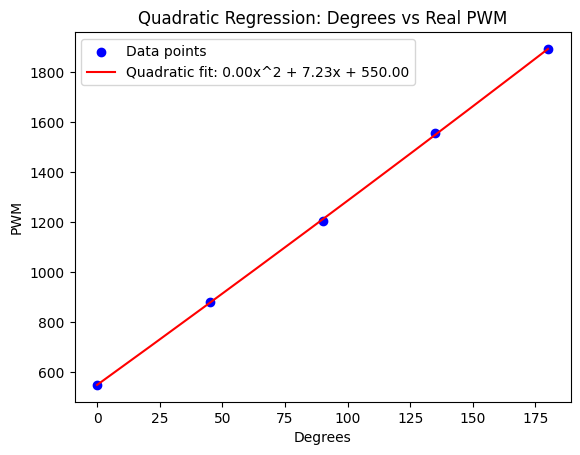








[ 590  910 1250 1620 1940], 6-------------

Quadratic equation coefficients: a = 0.001058201058201028, b = 7.387301587301591, c = 584.2857142857141


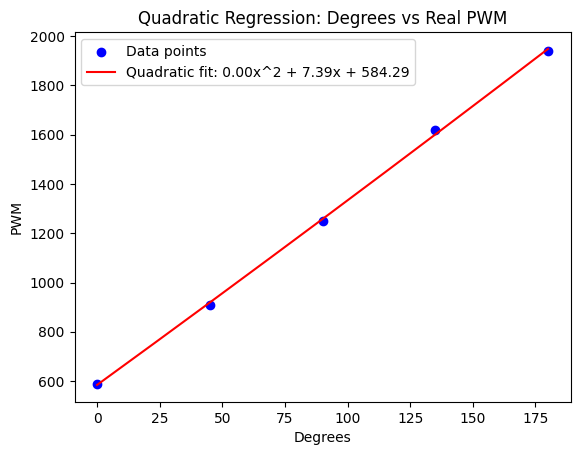








[ 550  883 1217 1580 1920], 7-------------

Quadratic equation coefficients: a = 0.0015167548500881886, b = 7.364761904761909, c = 548.7428571428567


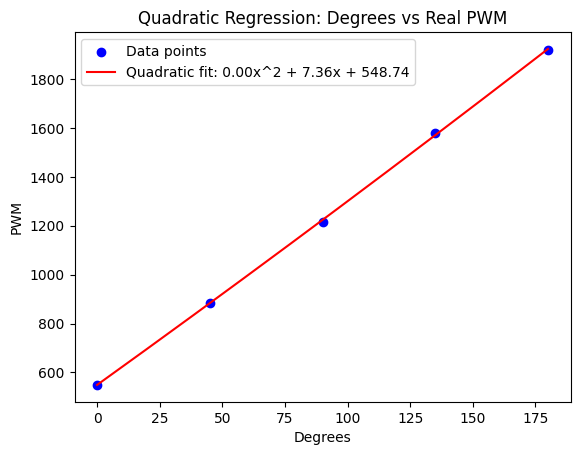








[ 560  883 1210 1555 1890], 8-------------

Quadratic equation coefficients: a = 0.0014814814814814573, b = 7.137777777777786, c = 559.2


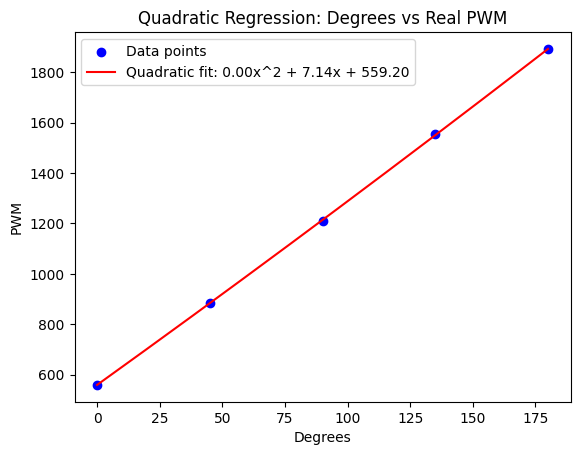








[ 620  940 1280 1640 1960], 9-------------

Quadratic equation coefficients: a = 0.0007054673721340612, b = 7.384126984126979, c = 614.8571428571427


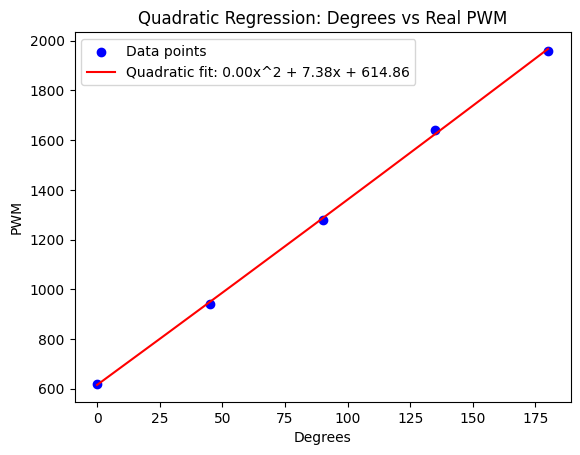








[ 630  970 1315 1660 1990], 10-------------

Quadratic equation coefficients: a = -0.0007054673721340433, b = 7.704761904761906, c = 628.142857142857


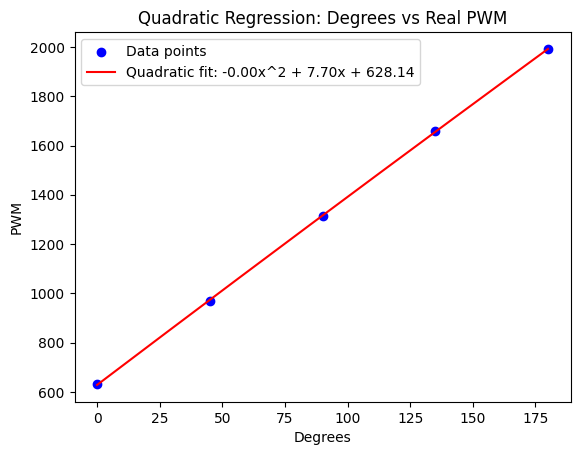








[ 640  970 1320 1670 1980], 11-------------

Quadratic equation coefficients: a = -0.0014109347442680725, b = 7.765079365079367, c = 634.2857142857141


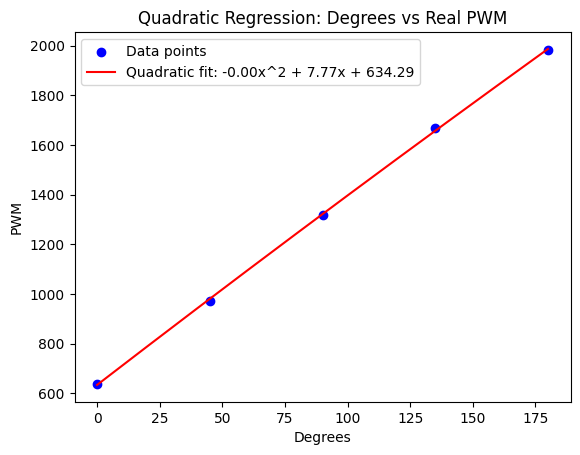

In [8]:
alll = [
  real_pwm_SFR,
  real_pwm_FFR,
  real_pwm_TFR,
  real_pwm_SFL,
  real_pwm_FFL,
  real_pwm_TFL,
  real_pwm_SBR,
  real_pwm_FBR,
  real_pwm_TBR,
  real_pwm_SBL,
  real_pwm_FBL,
  real_pwm_TBL
]
for i in range(len(alll)):
  real_pwm = alll[i]
  print(f"\n\n\n\n\n\n\n{alll[i]}, {i}-------------\n")
  # Data: Degrees and corresponding real PWM values
  degrees = np.array([0, 45, 90, 135, 180])  # x values (degree)

  # Perform quadratic regression (degree 2 polynomial)
  coefficients = np.polyfit(degrees, real_pwm, 2)

  # Coefficients: a, b, c (for ax^2 + bx + c)
  a, b, c = coefficients

  # Output the coefficients
  print(f"Quadratic equation coefficients: a = {a}, b = {b}, c = {c}")

  # Optional: Plotting the fit
  plt.scatter(degrees, real_pwm, color='blue', label='Data points')
  x_vals = np.linspace(0, 180, 1000)
  y_vals = a * x_vals**2 + b * x_vals + c
  plt.plot(x_vals, y_vals, color='red', label=f'Quadratic fit: {a:.2f}x^2 + {b:.2f}x + {c:.2f}')
  plt.xlabel('Degrees')
  plt.ylabel('PWM')
  plt.title('Quadratic Regression: Degrees vs Real PWM')
  plt.legend()
  plt.show()

# Save coefficents

In [ ]:
# load coefficents
test_a_SFR = 0.001
test_b_SFR =7.231
test_c_SFR = 563.085
test_coefficients_SFR = np.array([test_a_SFR, test_b_SFR, test_c_SFR])

test_a_FFR = 0
test_b_FFR = 7.348
test_c_FFR = 603.457
test_coefficients_FFR = np.array([test_a_FFR, test_b_FFR, test_c_FFR])

test_a_TFR = 0
test_b_TFR = 7.576
test_c_TFR = 554.285
test_coefficients_TFR = np.array([test_a_TFR, test_b_TFR, test_c_TFR])

In [ ]:
a_SFR = 0
b_SFR = 7.527
c_SFR = 597.6
coefficents_SFR = np.array([a_SFR, b_SFR, c_SFR])

a_FFR = 0
b_FFR = 7.682
c_FFR = 578.142
coefficents_FFR = np.array([a_FFR, b_FFR, c_FFR])

a_TFR = 0
b_TFR = 7.314
c_TFR = 619.028
coefficents_TFR = np.array([a_TFR, b_TFR, c_TFR])

#------------------------

a_SFL = 0 #
b_SFL = 7.274
c_SFL = 569.571
coefficents_SFL = np.array([a_SFL, b_SFL, c_SFL])

a_FFL = 0
b_FFL = 7.603
c_FFL = 625.428
coefficents_FFL = np.array([a_FFL, b_FFL, c_FFL])

a_TFL = 0.001
b_TFL = 7.233
c_TFL = 549.999
coefficents_TFL = np.array([a_TFL, b_TFL, c_TFL])

#------------------------

a_SBR = 0.001
b_SBR = 7.387
c_SBR = 584.285
coefficents_SBR = np.array([a_SBR, b_SBR, c_SBR])

a_FBR = 0.001
b_FBR = 7.364
c_FBR = 548.742
coefficents_FBR = np.array([a_FBR, b_FBR, c_FBR])

a_TBR = 0.001
b_TBR = 7.137
c_TBR = 559.2
coefficents_TBR = np.array([a_TBR, b_TBR, c_TBR])

#------------------------

a_SBL = 0
b_SBL = 7.384
c_SBL = 614.857
coefficents_SBL = np.array([a_SBL, b_SBL, c_SBL])

a_FBL = 0
b_FBL = 7.704
c_FBL = 628.142
coefficents_FBL = np.array([a_FBL, b_FBL, c_FBL])

a_TBL = -0.001
b_TBL = 7.765
c_TBL = 634.285
coefficents_TBL = np.array([a_TBL, b_TBL, c_TBL])

#Test

In [ ]:
def deg2PWM(desire_deg_angle, coefficents):
    a, b, c = coefficents
    pulse = round((a * desire_deg_angle**2) + (b * desire_deg_angle) + c, 0)
    return pulse

In [ ]:
desire_angles = np.array([90, 90, 0])
desire_PWM_SFR = deg2PWM(desire_angles[0], coefficents_SBL)
desire_PWM_FFR = deg2PWM(desire_angles[1], coefficents_FBL)
desire_PWM_TFR = deg2PWM(desire_angles[2], coefficents_TBL)

print(f"shoulder_angle_FR.writeMicroseconds({desire_PWM_SFR});\n  femur_angle_FR.writeMicroseconds({desire_PWM_FFR});\n  tibia_angle_FR.writeMicroseconds({desire_PWM_TFR}); ")

shoulder_angle_FR.writeMicroseconds(1279.0);
  femur_angle_FR.writeMicroseconds(1322.0);
  tibia_angle_FR.writeMicroseconds(634.0); 
